# Name Samarth Deshpande

# Student ID - 8894058

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Load Data

In [2]:
df = pd.read_csv("Lab2_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [9]:
df.shape

(5171, 4)

In [20]:
# Independent variable
X = df['text']
#Dependent variable
y = df['label_num']

# Use CountVectorizer to transform the text feature
vectorizer = CountVectorizer(max_features=2000)  

# Spliting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=100)

# Model Training and Evaluation

In [21]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Predict on the test set
svc_predictions = svc_model.predict(X_test)

# Evaluate SVC model using accuracy
svc_accuracy = accuracy_score(y_test, svc_predictions)
print("SVC Accuracy:", svc_accuracy)

SVC Accuracy: 0.9584541062801932


In [62]:
# Train Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train.toarray(), y_train)  

# Predict on the test set
gnb_predictions = gnb_model.predict(X_test.toarray())

# Evaluate Gaussian Naive Bayes model
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)

Gaussian Naive Bayes Accuracy: 0.9507246376811594


In [61]:
# Train Multinomial Naive Bayes model
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

# Predict on the test set
mnb_predictions = mnb_model.predict(X_test)

# Evaluate Multinomial Naive Bayes model
mnb_accuracy = accuracy_score(y_test, mnb_predictions)
print("Multinomial Naive Bayes Accuracy:", mnb_accuracy)

Multinomial Naive Bayes Accuracy: 0.9391304347826087


# My Inferences

#### SVC model achieved the highest accuracy 0.958, followed by Gaussian Naive Bayes, and then Multinomial Naive Bayes
#### Performance may be affected by the features chosen. 
#### Text is transformed into a bag-of-words representation via CountVectorizer, which may be more appropriate for SVM. 

# Part B

# Load Data

In [23]:
df2 = pd.read_csv("AB_NYC_2019.csv")
df2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [24]:
df2.shape

(48895, 16)

In [25]:
df2.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Checking the five summary statistics for variable price

In [33]:
summary_price = pd.DataFrame(df2['price'].describe())
summary_price

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


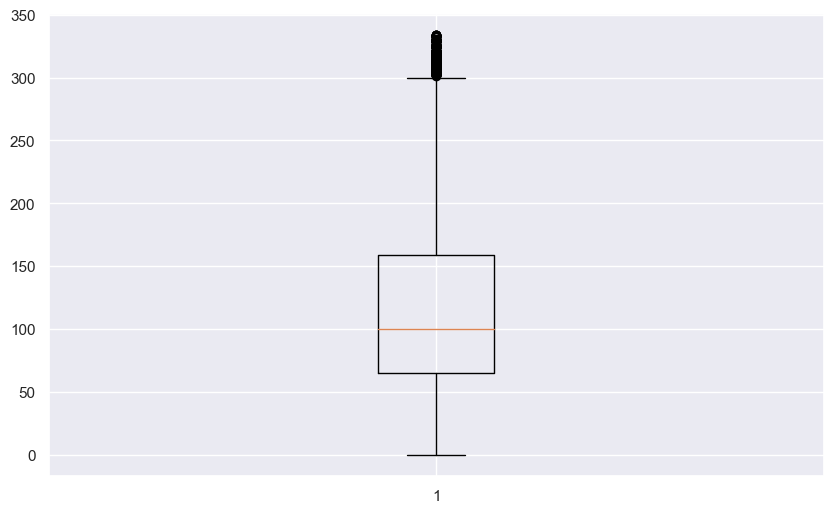

In [60]:
fig = plt.figure(figsize =(10,6))
plt.boxplot(df2['price'])
plt.show()

<Axes: xlabel='price', ylabel='Density'>

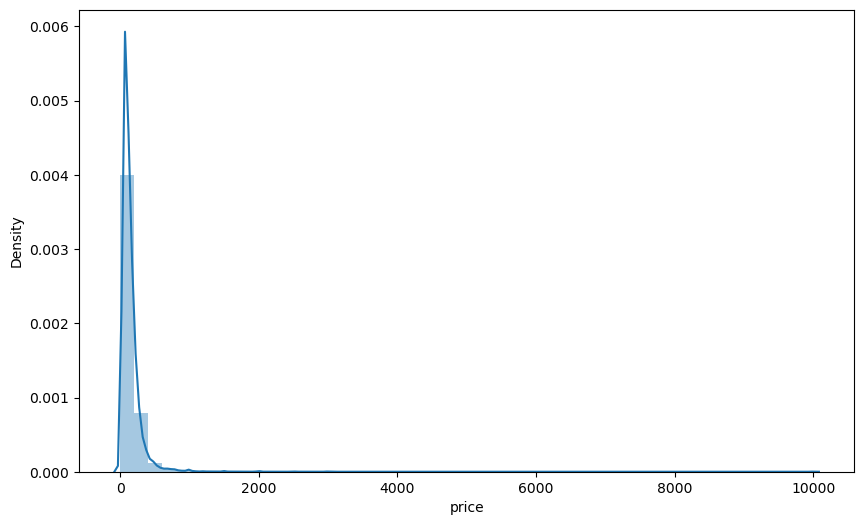

In [35]:
import warnings
warnings.filterwarnings("ignore")
fig = plt.figure(figsize =(10,6))
sns.distplot(df2['price'])

In [41]:
# Calculate Z-scores for the price variable 
price_mean = (df2['price']).mean()
price_std = (df2['price']).std()
Z_score = np.abs(((df2['price']) - price_mean) / price_std)
# Define threshold
Z_threshold = 3
filtered_data = df2[Z_score <= Z_threshold]

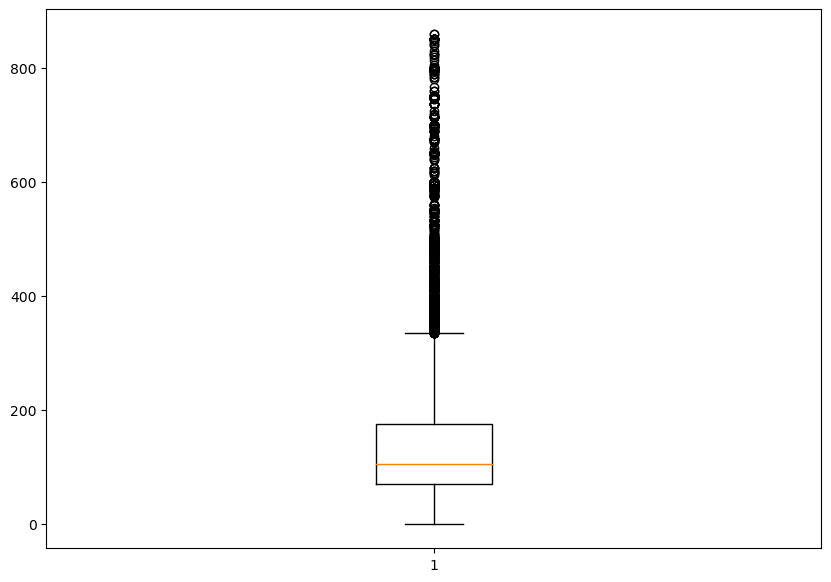

In [42]:
fig = plt.figure(figsize =(10,7))
plt.boxplot(filtered_data['price'])
plt.show()

<Axes: xlabel='price', ylabel='Density'>

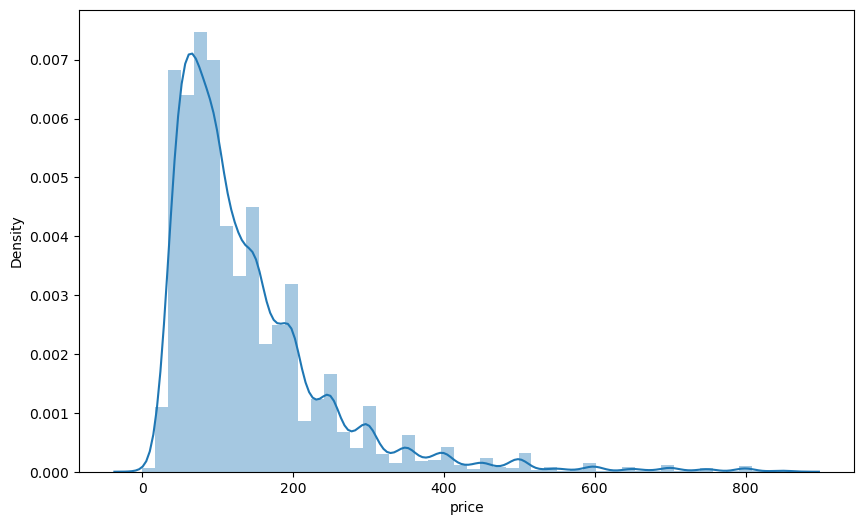

In [43]:
import warnings
warnings.filterwarnings("ignore")
fig = plt.figure(figsize =(10,6))
sns.distplot(filtered_data['price'])

In [44]:
price_zmean = (filtered_data['price']).mean()
price_zmedian = (filtered_data['price']).median()
price_zmode = (filtered_data['price']).mode()

In [46]:
print(" Mean:", price_zmean)
print(" Median:",price_zmedian)
print(" Mode :",price_zmode)

 Mean: 138.74690250891624
 Median: 105.0
 Mode : 0    100
Name: price, dtype: int64


# Using IQR 

In [47]:
## Find the IQR

iqr_value=quantile3-quantile1
print(iqr_value)

106.0


In [49]:
# Calculate Q1 and Q3
Quartile_1 = df2['price'].quantile(0.25)
Quartile_3 = df2['price'].quantile(0.75)


# Calculate IQR
Interquartile_range = Quartile_3 - Quartile_1

# Define lower and upper bounds
lower_bound = Quartile_1 - 1.5 * Interquartile_range
upper_bound = Quartile_3 + 1.5 * Interquartile_range

# Remove outliers
df3 = df2[(df2['price'] >= lower_bound) & (df2['price'] <= upper_bound)]

# Visualizing column price after treating with IQR

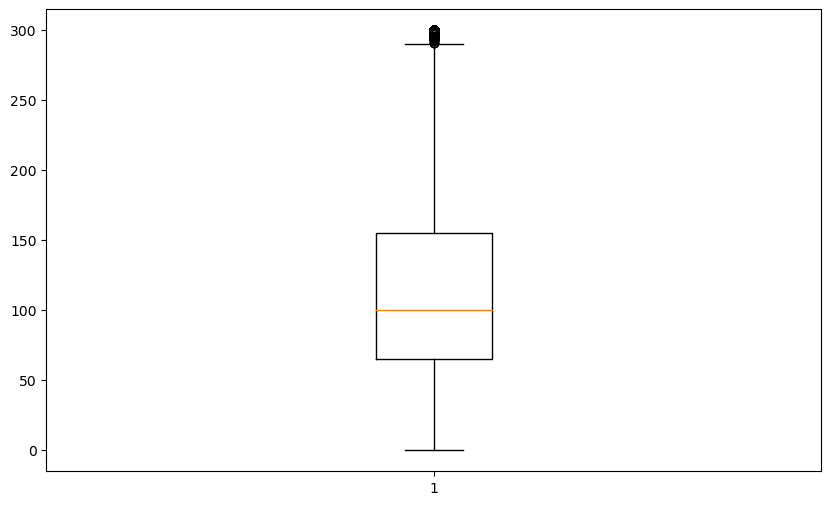

In [50]:
fig = plt.figure(figsize =(10,6))
plt.boxplot(df3['price'])
plt.show()

<Axes: xlabel='price', ylabel='Count'>

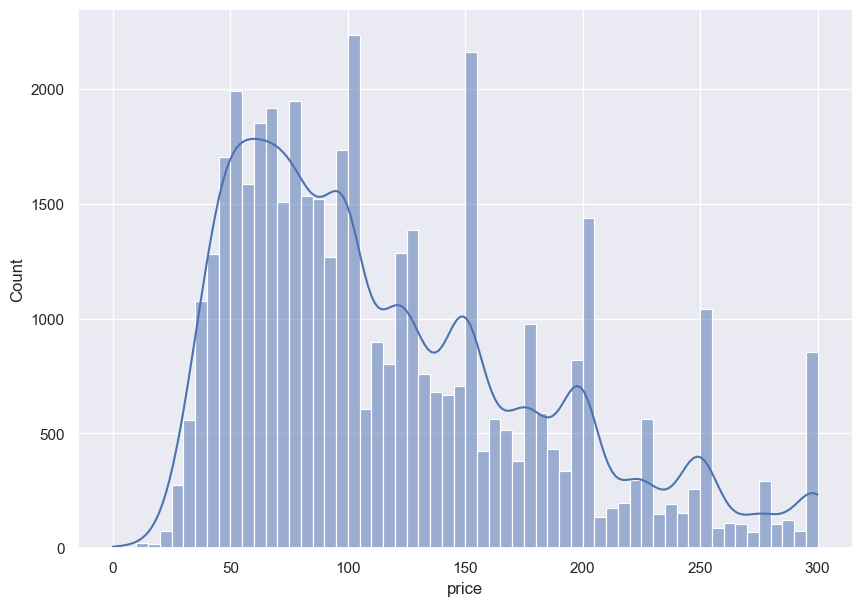

In [52]:
sns.histplot(data=df3, x='price', kde=True)

# Approach 1 (Z Score)

In [55]:
display(filtered_data['price'].describe())

count    48507.000000
mean       138.746903
std        107.558233
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max        860.000000
Name: price, dtype: float64

In [57]:
print(" Mean:", price_zmean)
print(" Median:",price_zmedian)
print(" Mode :",price_zmode)

 Mean: 138.74690250891624
 Median: 105.0
 Mode : 0    100
Name: price, dtype: int64


# Approach 2 (IQR)

In [56]:
display(df3['price'].describe())

count    45538.000000
mean       118.284070
std         65.908362
min          0.000000
25%         65.000000
50%        100.000000
75%        155.000000
max        300.000000
Name: price, dtype: float64

In [58]:
price_iqrmean = (df3['price']).mean()
price_iqrmedian = (df3['price']).median()
price_iqrmode = (df3['price']).mode()

In [59]:
print(" Mean:", price_iqrmean)
print(" Median:",price_iqrmedian)
print(" Mode :",price_iqrmode)

 Mean: 118.28407044665994
 Median: 100.0
 Mode : 0    100
Name: price, dtype: int64


# My inferences

#### Second Approach that is Using IQR for outlier dectection is best because

In IQR technique the mean is close to median and  when the mean is close to the median, it indicates a balanced distribution without a significant skew.
In IQR technique the median is exactly the same as mode and when they are equal, it suggests a balance in the distribution around the central tendency.
Based on the comparison, the IQR (Whiskers) Approach seems to be more effective in handling outliers and providing a central tendency measure less influenced by extreme values.